    Grillo, Gian Franco.


# 

Imports para los ejercicios

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Seteo para ver todas las columnas cuando muestro un dataframe
pd.set_option('display.max_columns', None)

# 

# CONSIGNA

Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto para el proyecto final del curso.

#  

# 

## The Spotify Hit Predictor Dataset (1960-2019).

Cargamos y vemos el dataset

In [3]:
df_spotify = pd.read_csv('https://raw.githubusercontent.com/gfgrillo3/DS_CoderHouse/main/Datasets/dataset-of-10s.csv', sep=',')

df_spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


### División de dataset

Dividimos X e Y

In [4]:
X = df_spotify.drop(columns=["track", "artist", "uri", "target"], axis=1)
y = df_spotify["target"]

Dividimos en train y test con una relación 70/30

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### Modelado

Definimos el modelo

In [6]:
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state = 42)

Entrenamos con los subconjuntos de train

In [7]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Vemos predicciones

In [8]:
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

In [9]:
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('{:.2%} de accuracy en el conjunto de train'.format(train_accuracy))
print('{:.2%} de accuracy en el conjunto de test'.format(test_accuracy))

83.16% de accuracy en el conjunto de train
80.78% de accuracy en el conjunto de test


Veamos la matriz de confusión

<AxesSubplot:>

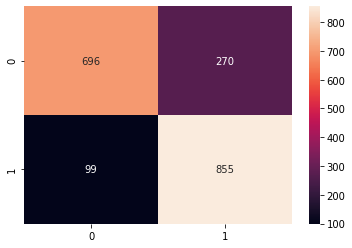

In [10]:
matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix, annot=True, fmt='d')

Vemos que hay 270 canciones que no eran HIT, pero el modelo la clasificó como un hit.

Sería de interés por reducir este valor

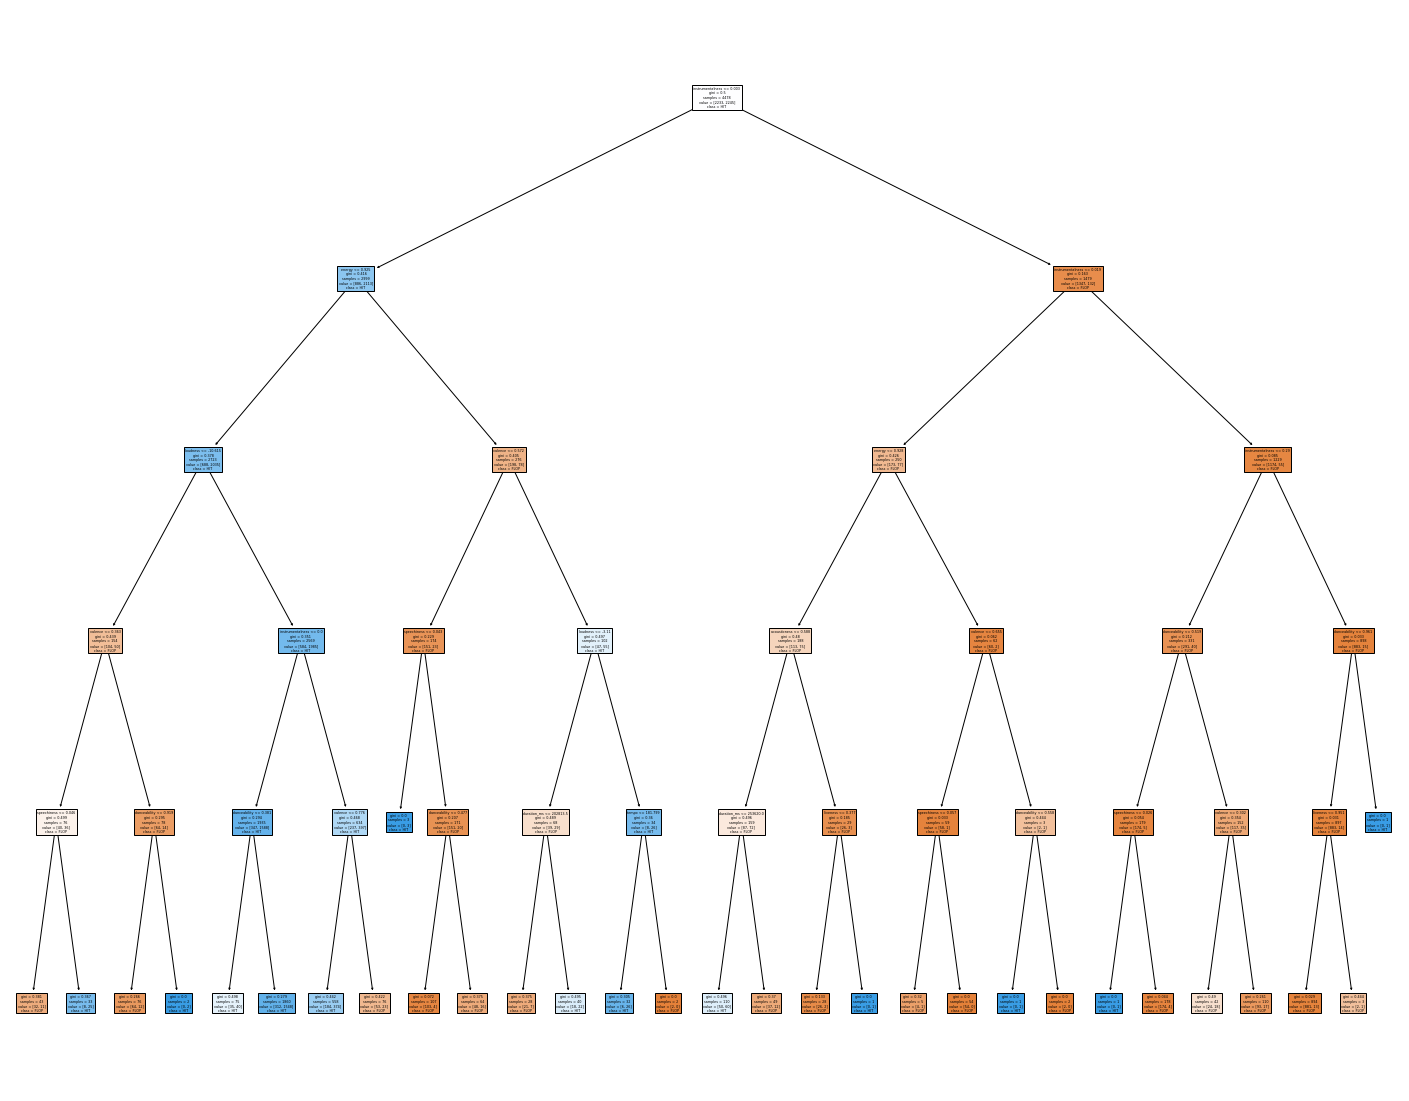

In [11]:
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(decision_tree_model, 
                   feature_names=X.columns,
                   class_names=["FLOP", "HIT"],
                   filled=True)

# 

Usemos GridSearch para ver cuánto mejoramos modificando algunos parámetros

In [12]:
param_grid = {
    'max_depth': [3, 5, 8, 10, 12],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [15, 30, 50]
}


grid_search = GridSearchCV(estimator = decision_tree_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [13]:
grid_search.fit(X_train,y_train)

grid_search.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15}

Armemos el modelo con estos parámetros

In [14]:
decision_tree_model_mejorado = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=15, random_state=42)

87.45% de accuracy en el conjunto de train
81.51% de accuracy en el conjunto de test


<AxesSubplot:>

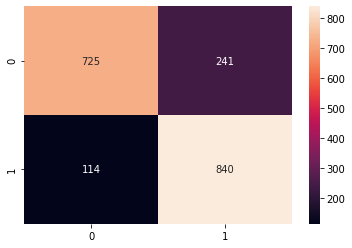

In [15]:

decision_tree_model_mejorado.fit(X_train,y_train)

y_train_pred = decision_tree_model_mejorado.predict(X_train)
y_test_pred = decision_tree_model_mejorado.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('{:.2%} de accuracy en el conjunto de train'.format(train_accuracy))
print('{:.2%} de accuracy en el conjunto de test'.format(test_accuracy))

matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix, annot=True, fmt='d')

Si bien vemos que mejoramos un 1% aproximadamente el accuracy, y redujimos de 270 a 241 los casos en donde clasificamos una canción como HIT, cuando no lo era, también aumentaron de 99 a 114 los casos en donde era un HIT y lo clasificamos como que no era un HIT.

En la implementación final se trabajará más con las variables para poder obtener mejores resultados